## Asset Allocation and Portfolio Analysis 

Asset Allocation and Portfolio Analysis 
In this project, I use Python to perform portfolio analysis such as calculating portfolio returns, risj and Sharpe ratio. 

A portfolio is a collection of financial investments such as stocks, fixed income securities (bonds), cash, mutual funds and Exchange Traded Funds (ETFs).


#S This project is extremely practical and directly applicable to banking and finance sectors. 

S: I won't be doing portfolio optimization in this project, just perform asset allocation and portfolio analysis, so I'll be assuming random asset allocation at first, then I'll see how that portfolio will grow over time, I'll calculate all the different metrics, average return, risk and the sharp ratio as well.

# IMPORT LIBRARIES & DATASETS AND PERFORM DATA VISUALIZATION

In [31]:
!pip install plotly 
#had to go in and manually install plotly because when running the
#cells below got a error messasge 'no module named plotly'
!pip install scipy

You should consider upgrading via the 'c:\users\samantha\pycharmprojects\giraffe\venv\scripts\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\users\samantha\pycharmprojects\giraffe\venv\scripts\python.exe -m pip install --upgrade pip' command.


In [32]:
import pandas as pd #pandas is like the excel for python
import plotly.express as px ##used for interactive data visualization
from copy import copy
from scipy import stats
import matplotlib.pyplot as plt #used for data visualization
import numpy as np #used for arrays manipulation
import plotly.figure_factory as ff
import plotly.graph_objects as go

In [33]:
# Read the stock data file
stocks_df = pd.read_csv('stock_data.csv')
stocks_df



,Date,FB,TWTR,NFLX
0,2013-11-07,47.560001,44.900002,46.694286
1,2013-11-08,47.529999,41.650002,47.842857
2,2013-11-11,46.200001,42.900002,48.272858
3,2013-11-12,46.610001,41.900002,47.675713
4,2013-11-13,48.709999,42.599998,47.897144
...,...,...,...,...
1707,2020-08-20,269.010010,38.959999,497.899994
1708,2020-08-21,267.010010,39.259998,492.309998
1709,2020-08-24,271.390015,40.490002,488.809998
1710,2020-08-25,280.820007,40.549999,490.579987


In [34]:
stocks_df.columns

Index(['Date', 'FB', 'TWTR', 'NFLX'], dtype='object')

Going to showcase how making a simple buy and sell decision, could dramtically impact the pverall value of the protfolio over the years. Were going to see that when we assume random allocation, to see the totl networth of our prtfolio if we maybe invested all of our money in a certain stock. 

In [35]:
# Function to plot interactive plot
# going to create a function and name the function 'interactive_plot'
def interactive_plot(df,title): #this function will take 2 things, a dataframe and title and essentialy plot the data frame. Title will just be the title of out plot
    fig = px.line(title = title)
    for i in df.columns [1:]: #[1] is where you want to start from. The colon after means you want all the columns coming up adter the date. this will return back the names in the columns, exclusing the first column with an index of 0 ,so no date column but every index after.s
        fig.add_scatter(x = df['Date'], y = df[i], name = i) #adding plots to our figure object. in the x axis we want to plt our date column, and in our y axis i want to plot all the different columns.
        #Plotting i will take all the names in the column except for the date. So for the first loop i will be equal to fb, for the second loop equal to twitter etc
    fig.show()
    
#px.line is plotly express. The title here will equal to whatever title is being sent to that function. The title is just the title for our plot.
#fig is our object in which we'll be using plotly express
#for the firt loop i will be equal to Fb, the second loop i will be twitter the third loop i will be equal to netflix

In [36]:
# Plot interactive chart
#s so we've defined the function above and now it's time to call that function
interactive_plot(stocks_df,'Prices of Stocks') #sending that fucntion our dataframe and giving it our own specific title
#tital can be called whatever you want

#so what were doing here is that we just want to interactivley plot all of our stock Prices
#plotly express is more interactive than matplot lib. You can zoom in to analyze the data 
#and you can also compare the data on hover, and you can compare all of the different line plots. 
#matplot won't really do that.

Normalization Function
- Create a function to perform scaling or normalization
- Apply the function to the stocks dataframe and perform sanity check

In [37]:
# we want to scale our data so that all of our stocks will start at the same price. We want to scale of the different columns. We need the value to be 1 
def normalize(df):
    x =  df.copy() # just creating a copy of our data frame I guess to avoid making changes to the original one
    for i in x.columns[1:]: #skipping our date column, so from index 1 onwards
        x[i] = x[i]/x[i][0] #x of i of 0, will return the first element of each column.
    return x #okay return x back for me

#s If I divide a column by the first value in that column, that means i'm scaling that column.That meansall of them would be normalized and they would start from the same starting point,

In [38]:
interactive_plot(normalize(stocks_df),'Normalized Prices') #call the normalize function, the pass along the stocks df, then pass along the title as well to fit the two arguments of the interactiv eplot function we defined

In [39]:
#so after doing this we notice that all of our prices start at 1, which means all of them have been scaled/normalized 

# ASSET ALLOCATION

Asset Allocation is an investment strategy that is used to allocated client's assets based on their risk tolerance, target returns and investment time span. 

The goal of portfolio managers is to maximize returns and reduce risks. 

Asset classes include: 
Equities (stocks) 
Fixed Income securities (Bonds) 
Cash and equivalents 
ETFS (Exchange Traded Funds)
Real Estate 
Commodities 

In [40]:
#Say we have a million dollars and we can only invest in fb, ntflx and twtr
# going to invest the million dollars according to the specific percentages of the weights.those numbers are randomly generated numbers so don't really pay attention to them 
#We're going to develop a code where we allocate that million dollars across the 3 assets. We're going to track the growth progress of all stocks over the years.Starting from 2013 till 2020
#then we'll see if we'll see for example if we invested 1 mill, with a specific weight allocation, how much money you would have ended up with by 2020.
#we're going to try random various weights(randomly generated)

#So with portfolio optomization, we're trying to find the optimal weights we can put to try to get the maximum return possible and to minimize risk as much as we can.  


# PERFORM RANDOM ASSET ALLOCATION AND CALCULATE PORTFOLIO DAILY RETURN

In [41]:
# Let's create random portfolio weights 
#S create/generate 3 random numbers and they have to equate to 1, these will be the percentages of the allocations for al 3 stocks.
#s in order to do that we'll use numpy to do that

#s np.random.random(3) #this will generate 3 random numbers, but these 3 numbers do not sum equal to 1 so...

weight = np.array(np.random.random(3))
# Ensure that the sum of all weights are = 1
weights = weight/np.sum(weight) #when you divide by the sumation of all these 3 numbers, this will generate 3 numbers with a summation of 1
weights
# Portfolio weights must sum to 1 

# Set random seed
# np.random.seed(101)

# Create random weights for the stocks and normalize them

# Ensure that the sum of all weights are = 1




array([0.75949653, 0.12007802, 0.12042545])

In [42]:
# Naming our scaled data, from when we created the normalize function from the stocks_df. Normalize the stock avalues 

df_normalized_portfolio = normalize(stocks_df)
df_normalized_portfolio

,Date,FB,TWTR,NFLX
0,2013-11-07,1.000000,1.000000,1.000000
1,2013-11-08,0.999369,0.927617,1.024598
2,2013-11-11,0.971405,0.955457,1.033807
3,2013-11-12,0.980025,0.933185,1.021018
4,2013-11-13,1.024180,0.948775,1.025760
...,...,...,...,...
1707,2020-08-20,5.656224,0.867706,10.662975
1708,2020-08-21,5.614172,0.874387,10.543260
1709,2020-08-24,5.706266,0.901782,10.468304
1710,2020-08-25,5.904542,0.903118,10.506210


In [43]:
df_normalized_portfolio.columns

Index(['Date', 'FB', 'TWTR', 'NFLX'], dtype='object')

In [44]:
df_normalized_portfolio.columns[1:]

Index(['FB', 'TWTR', 'NFLX'], dtype='object')

In [45]:
# Note that enumerate returns the value (inside our coulumns) and a counter as well. The counter will start with 0,1,2
for counter, stock in enumerate(df_normalized_portfolio.columns[1:]):
  df_normalized_portfolio[stock] = df_normalized_portfolio[stock] * weights[counter]
  df_normalized_portfolio[stock] = df_normalized_portfolio[stock] * 1000000
df_normalized_portfolio.round(decimals = 0) #this is to round the df to the nearest decimal and round them up

#we want to obtain the weights (what we got in the sumation of our array) by what we got in the scaled value of our 'df_normalized_portfolio'

,Date,FB,TWTR,NFLX
0,2013-11-07,759497.0,120078.0,120425.0
1,2013-11-08,759017.0,111386.0,123388.0
2,2013-11-11,737778.0,114729.0,124497.0
3,2013-11-12,744326.0,112055.0,122957.0
4,2013-11-13,777861.0,113927.0,123528.0
...,...,...,...,...
1707,2020-08-20,4295882.0,104192.0,1284094.0
1708,2020-08-21,4263944.0,104995.0,1269677.0
1709,2020-08-24,4333889.0,108284.0,1260650.0
1710,2020-08-25,4484479.0,108445.0,1265215.0


In [46]:
# Let's create an additional column that contains the sum of all $ values in the portfolio
df_normalized_portfolio['portfolio daily worth in $'] = df_normalized_portfolio[df_normalized_portfolio != 'Date'].sum(axis = 1)
df_normalized_portfolio

#this column would the sumation of all investments across all your different stocks
#essentially saying go to my portfolio and sum all of the columns excluding the date column, and add that in a new column called 'portfoli daily worth in dollars'
#this is a very important column because it shows you starting from a million dollars, then it shows what you ended up with from your investments in the end

,Date,FB,TWTR,NFLX,portfolio daily worth in $
0,2013-11-07,7.594965e+05,120078.023731,1.204254e+05,1.000000e+06
1,2013-11-08,7.590174e+05,111386.407701,1.233876e+05,9.937915e+05
2,2013-11-11,7.377784e+05,114729.336943,1.244966e+05,9.770043e+05
3,2013-11-12,7.443258e+05,112054.993549,1.229566e+05,9.793373e+05
4,2013-11-13,7.778611e+05,113927.023227,1.235276e+05,1.015316e+06
...,...,...,...,...,...
1707,2020-08-20,4.295882e+06,104192.415948,1.284094e+06,5.684168e+06
1708,2020-08-21,4.263944e+06,104994.716292,1.269677e+06,5.638615e+06
1709,2020-08-24,4.333889e+06,108284.169364,1.260650e+06,5.702824e+06
1710,2020-08-25,4.484479e+06,108444.621944,1.265215e+06,5.858139e+06


In [47]:
# Let's calculate the portfolio daily return 
# Define a new column in the dataframe and set it to zeros
df_normalized_portfolio['portfolio daily % return'] = 0.0000

#think to find the portfolio daily worth, you take the second value and subratct the first value and divide it by the first value. 
#This will tell you the change. Remember new value-old value/old value times 100

#create for loop that goes through every element of your stocks_df

for i in range(1, len(stocks_df)):
  # Calculate the percentage of change from the previous day
  df_normalized_portfolio['portfolio daily % return'][i] = ( (df_normalized_portfolio['portfolio daily worth in $'][i] - df_normalized_portfolio['portfolio daily worth in $'][i-1]) / df_normalized_portfolio['portfolio daily worth in $'][i-1]) * 100 

df_normalized_portfolio.round(decimals = 0)

,Date,FB,TWTR,NFLX,portfolio daily worth in $,portfolio daily % return
0,2013-11-07,759497.0,120078.0,120425.0,1000000.0,0.0
1,2013-11-08,759017.0,111386.0,123388.0,993791.0,-1.0
2,2013-11-11,737778.0,114729.0,124497.0,977004.0,-2.0
3,2013-11-12,744326.0,112055.0,122957.0,979337.0,0.0
4,2013-11-13,777861.0,113927.0,123528.0,1015316.0,4.0
...,...,...,...,...,...,...
1707,2020-08-20,4295882.0,104192.0,1284094.0,5684168.0,2.0
1708,2020-08-21,4263944.0,104995.0,1269677.0,5638615.0,-1.0
1709,2020-08-24,4333889.0,108284.0,1260650.0,5702824.0,1.0
1710,2020-08-25,4484479.0,108445.0,1265215.0,5858139.0,3.0


When running the random allocation run 3 more times and then comparing the final calue on Aug 26th, 2020 to its initial value ($1M) on November 7th, 2013, I noticed a big difference. The portfolio grew more when the random generated weights invested more into netflix.

# PORTFOLIO ALLOCATION - DAILY RETURN/WORTH CALCULATION (FUNCTION)

In [48]:
# Lets assume we have $1,000,000 to be invested and we will allocate this fund based on the weights of the stocks
# We will create a function that takes in the stock prices along with the weights and retun:
# (1) Daily value of each individual security in $ over the specified time period
# (2) Overall daily worth of the entire portfolio 
# (3) Daily return 

def portfolio_allocation(df, weights): #function recieves a df and a weights abs
    
    df_normalized_portfolio = df.copy()  #creating a copy of our df
  
  # Normalize the stock avalues 
    
    df_portfolio = normalize(df_normalized_portfolio) # calling the fucntion normalize on the copy we just made
    
    for counter, stock in enumerate(df_portfolio.columns[1:]):
        df_portfolio[stock] = df_portfolio[stock] * weights[counter] #weights of 0,1,2
        df_portfolio[stock] = df_portfolio[stock] * 1000000 
    #this for loop will go through every sinlge column that I have in the dataframe except for date

    df_portfolio['portfolio daily worth in $'] = df_portfolio[df_portfolio != 'Date'].sum(axis = 1)
  
    df_portfolio['portfolio daily % return'] = 0.0000

    for i in range(1, len(stocks_df)):
    
    # Calculate the percentage of change from the previous day
        df_portfolio['portfolio daily % return'][i] = ( (df_portfolio['portfolio daily worth in $'][i] - df_portfolio['portfolio daily worth in $'][i-1]) / df_portfolio['portfolio daily worth in $'][i-1]) * 100 
  
  # set the value of first row to zero, as previous value is not available
    df_portfolio['portfolio daily % return'][0] = 0
    return df_portfolio

In [49]:
# Call the function with it's name 'portfolio_allocation' and then send it two arguments, the dataframe then the weights
df_portfolio = portfolio_allocation(stocks_df, weights)
df_portfolio

,Date,FB,TWTR,NFLX,portfolio daily worth in $,portfolio daily % return
0,2013-11-07,7.594965e+05,120078.023731,1.204254e+05,1.000000e+06,0.000000
1,2013-11-08,7.590174e+05,111386.407701,1.233876e+05,9.937915e+05,-0.620854
2,2013-11-11,7.377784e+05,114729.336943,1.244966e+05,9.770043e+05,-1.689201
3,2013-11-12,7.443258e+05,112054.993549,1.229566e+05,9.793373e+05,0.238790
4,2013-11-13,7.778611e+05,113927.023227,1.235276e+05,1.015316e+06,3.673755
...,...,...,...,...,...,...
1707,2020-08-20,4.295882e+06,104192.415948,1.284094e+06,5.684168e+06,2.473263
1708,2020-08-21,4.263944e+06,104994.716292,1.269677e+06,5.638615e+06,-0.801399
1709,2020-08-24,4.333889e+06,108284.169364,1.260650e+06,5.702824e+06,1.138723
1710,2020-08-25,4.484479e+06,108444.621944,1.265215e+06,5.858139e+06,2.723475


#  PERFORM PORTFOLIO DATA VISUALIZATION

In [50]:
# Plot the portfolio daily return #here we're using plotly express library which we imported as px
fig = px.line(x = df_portfolio.Date, y = df_portfolio['portfolio daily % return'], title = 'Porfolio Daily Percentage Return')
fig.show()

In [51]:
# Plot all stocks (normalized)
interactive_plot(df_portfolio.drop(['portfolio daily worth in $','portfolio daily % return'], axis = 1), 'Portfolio individual stocks worth in dollars')

In [52]:
# Print out a histogram of daily returns
fig = px.histogram(df_portfolio, x = 'portfolio daily % return')
fig.show()

#the histogram/ distribution of all the returns looks this way, because most of the time stocks do not change dramatically
#The dispersion away from the mean is the standard deviation. That's a measure of the risk. Investors are risk adverse. 

In [53]:
#showing the portfolio daily worth in dolars 
fig = px.line(x = df_portfolio.Date, y = df_portfolio['portfolio daily worth in $'],title = 'Portfolio daily worth in $')
fig.show()

# UNDERSTAND PORTFOLIO STATISTICAL METRICS (CUMMULATIVE RETURN, AVERAGE DAILY RETURN, AND SHARPE RATIO)

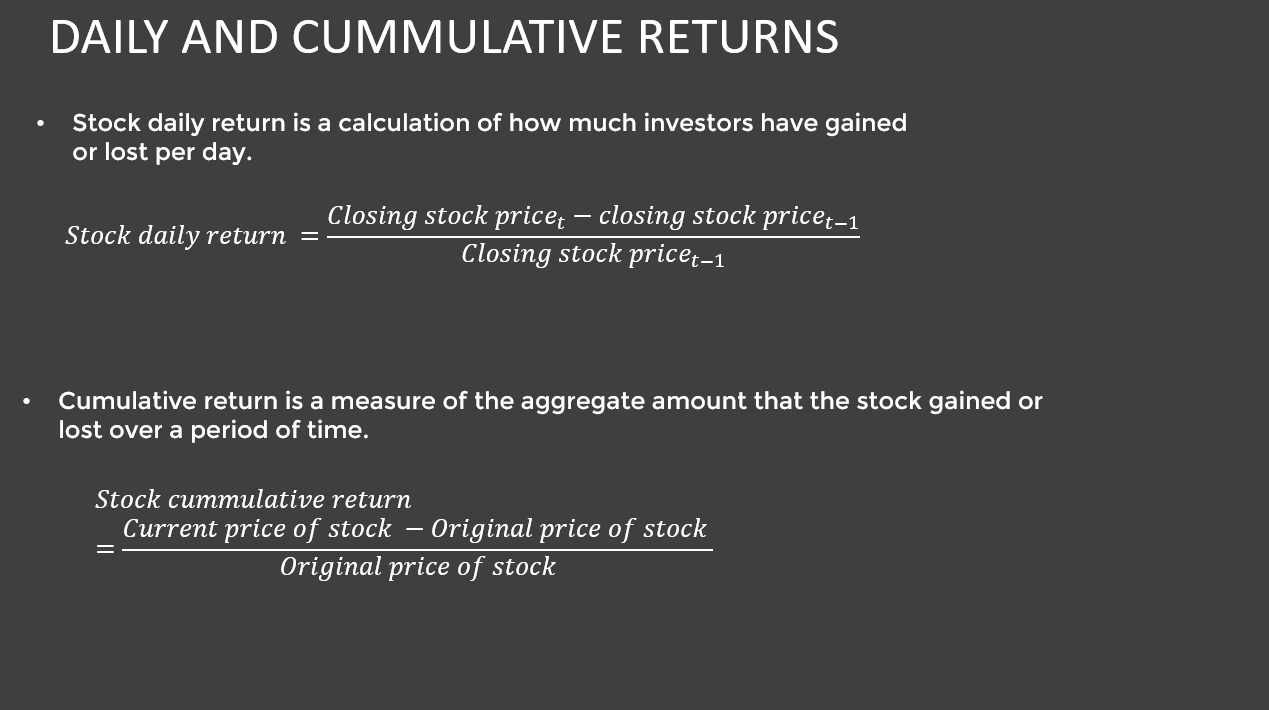

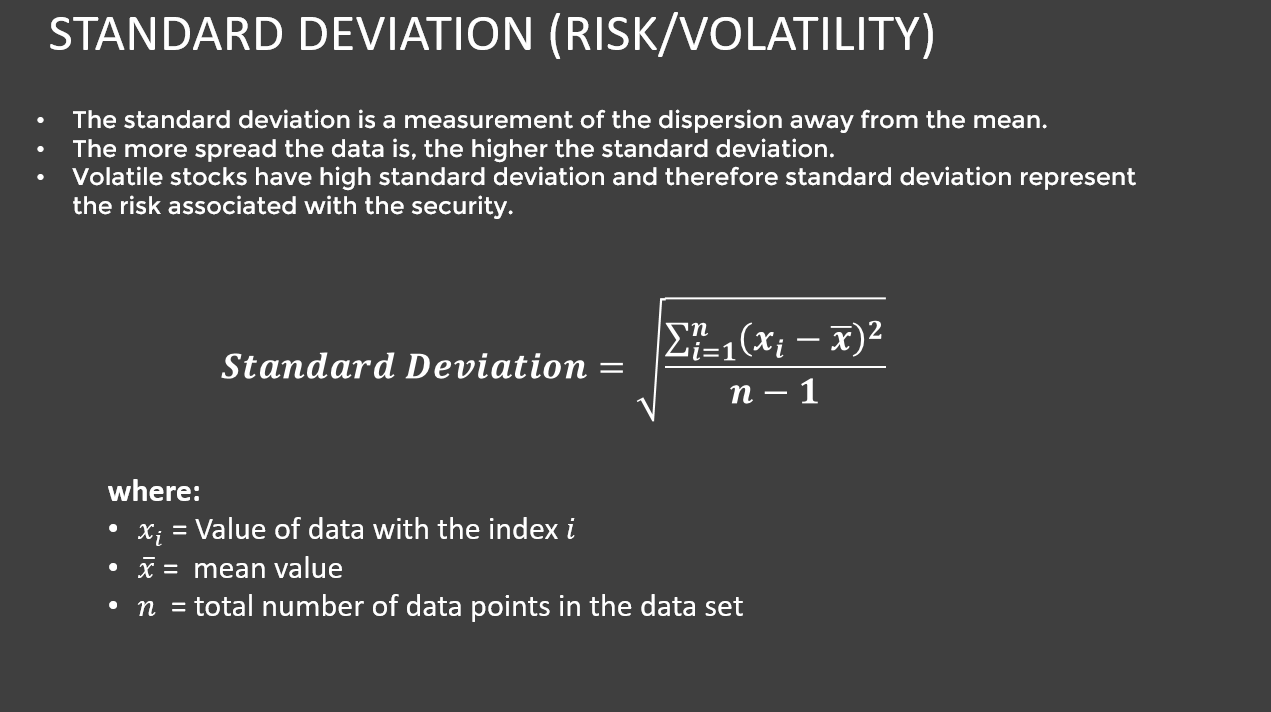

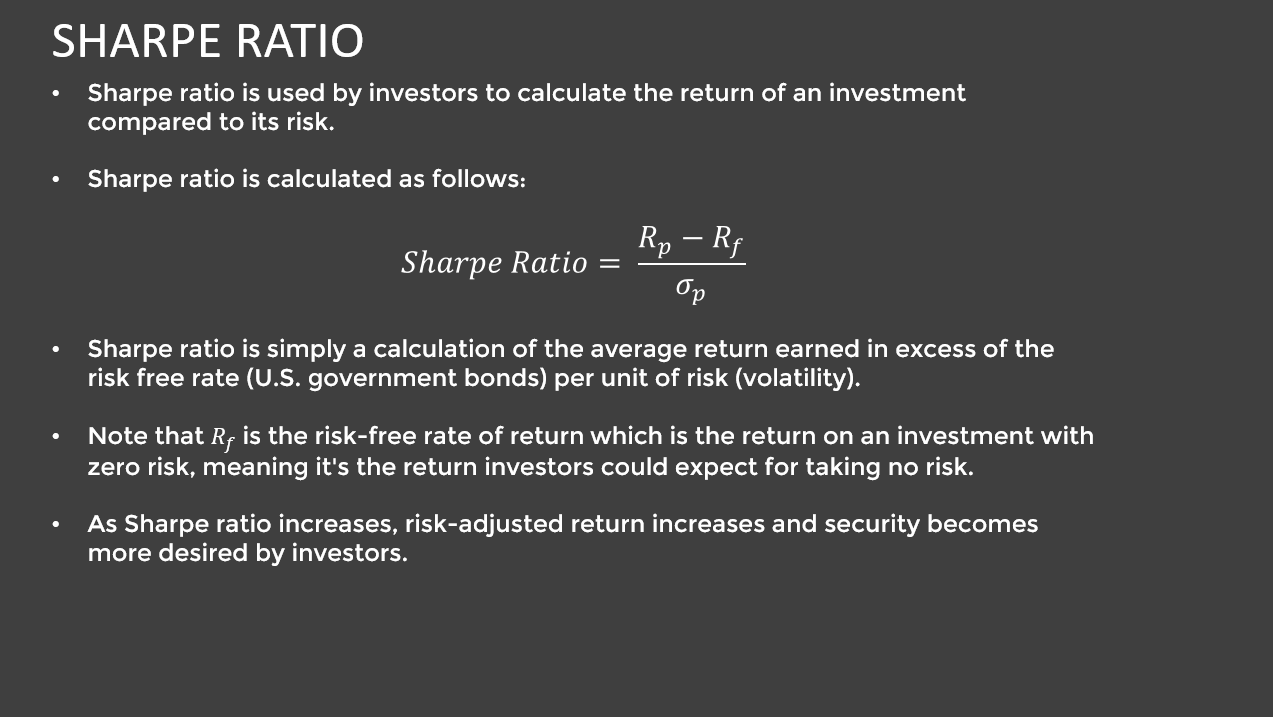

# CALCULATE PORTFOLIO STATISTICAL METRICS (CUMMULATIVE RETURN, AVERAGE DAILY RETURN, AND SHARPE RATIO)

In [54]:
df_portfolio

,Date,FB,TWTR,NFLX,portfolio daily worth in $,portfolio daily % return
0,2013-11-07,7.594965e+05,120078.023731,1.204254e+05,1.000000e+06,0.000000
1,2013-11-08,7.590174e+05,111386.407701,1.233876e+05,9.937915e+05,-0.620854
2,2013-11-11,7.377784e+05,114729.336943,1.244966e+05,9.770043e+05,-1.689201
3,2013-11-12,7.443258e+05,112054.993549,1.229566e+05,9.793373e+05,0.238790
4,2013-11-13,7.778611e+05,113927.023227,1.235276e+05,1.015316e+06,3.673755
...,...,...,...,...,...,...
1707,2020-08-20,4.295882e+06,104192.415948,1.284094e+06,5.684168e+06,2.473263
1708,2020-08-21,4.263944e+06,104994.716292,1.269677e+06,5.638615e+06,-0.801399
1709,2020-08-24,4.333889e+06,108284.169364,1.260650e+06,5.702824e+06,1.138723
1710,2020-08-25,4.484479e+06,108444.621944,1.265215e+06,5.858139e+06,2.723475


In [55]:
# Cummulative return of the portfolio (Note that we now look for the last net worth of the portfolio compared to it's start value)
cummulative_return = ((df_portfolio['portfolio daily worth in $'][-1:] - df_portfolio['portfolio daily worth in $'][0])/ df_portfolio['portfolio daily worth in $'][0]) * 100
print('Cummulative return of the portfolio is {} %'.format(cummulative_return.values[0]))


Cummulative return of the portfolio is 537.5160683724145 %


#So to calculate the cummmulative return, if you obtain the final value of the entire portfolio and if you subtract that from the initial investment, and then divide by the initial investment, that'll give you the cummilative return. 


In [56]:
# Calculate the portfolio standard deviation
print('Standard deviation of portfolio = {}'.format(df_portfolio['portfolio daily % return'].std()))

Standard deviation of portfolio = 1.9003859052870042


In [57]:
# Calculate the average daily return 
print('Average Daily Retrun of portfolio = {}'.format(df_portfolio['portfolio daily % return'].mean()))

Average Daily Retrun of portfolio = 0.1263804118659946


In [58]:
# Portfolio sharpe ratio
#doing a very quick and basic approx, so we're assuming that the risk free return is 0, so basically just doing return divided by risk
sharpe_ratio = df_portfolio['portfolio daily % return'].mean() / df_portfolio['portfolio daily % return'].std() * np.sqrt(252) # the 252 is the estimate trading days you have in a year
print('Sharpe ratio of the portfolio is {}'.format(sharpe_ratio))

#the higher the sharpe ratio, the better, means theres more return per unit of risk.

Sharpe ratio of the portfolio is 1.0556944443455238
